# Flight Price:

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?


In [1]:
import pandas as pd 
import numpy as np
df=pd.read_excel('flight_price.xlsx')
df.shape

(10683, 11)

## 10683 rows and 11 coulms


# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

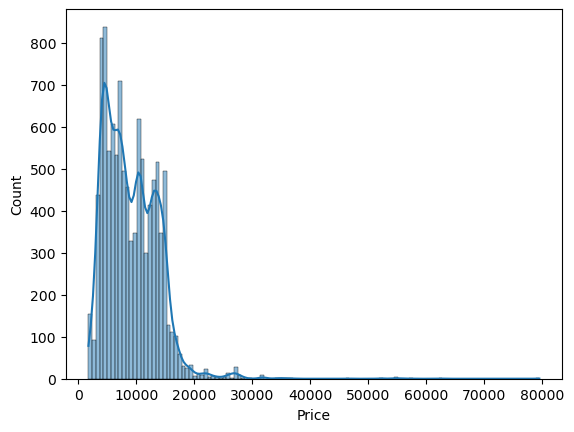

In [2]:
import seaborn as sns
sns.histplot(df['Price'],kde='True')


# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [3]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## min:1759  max 79512

# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

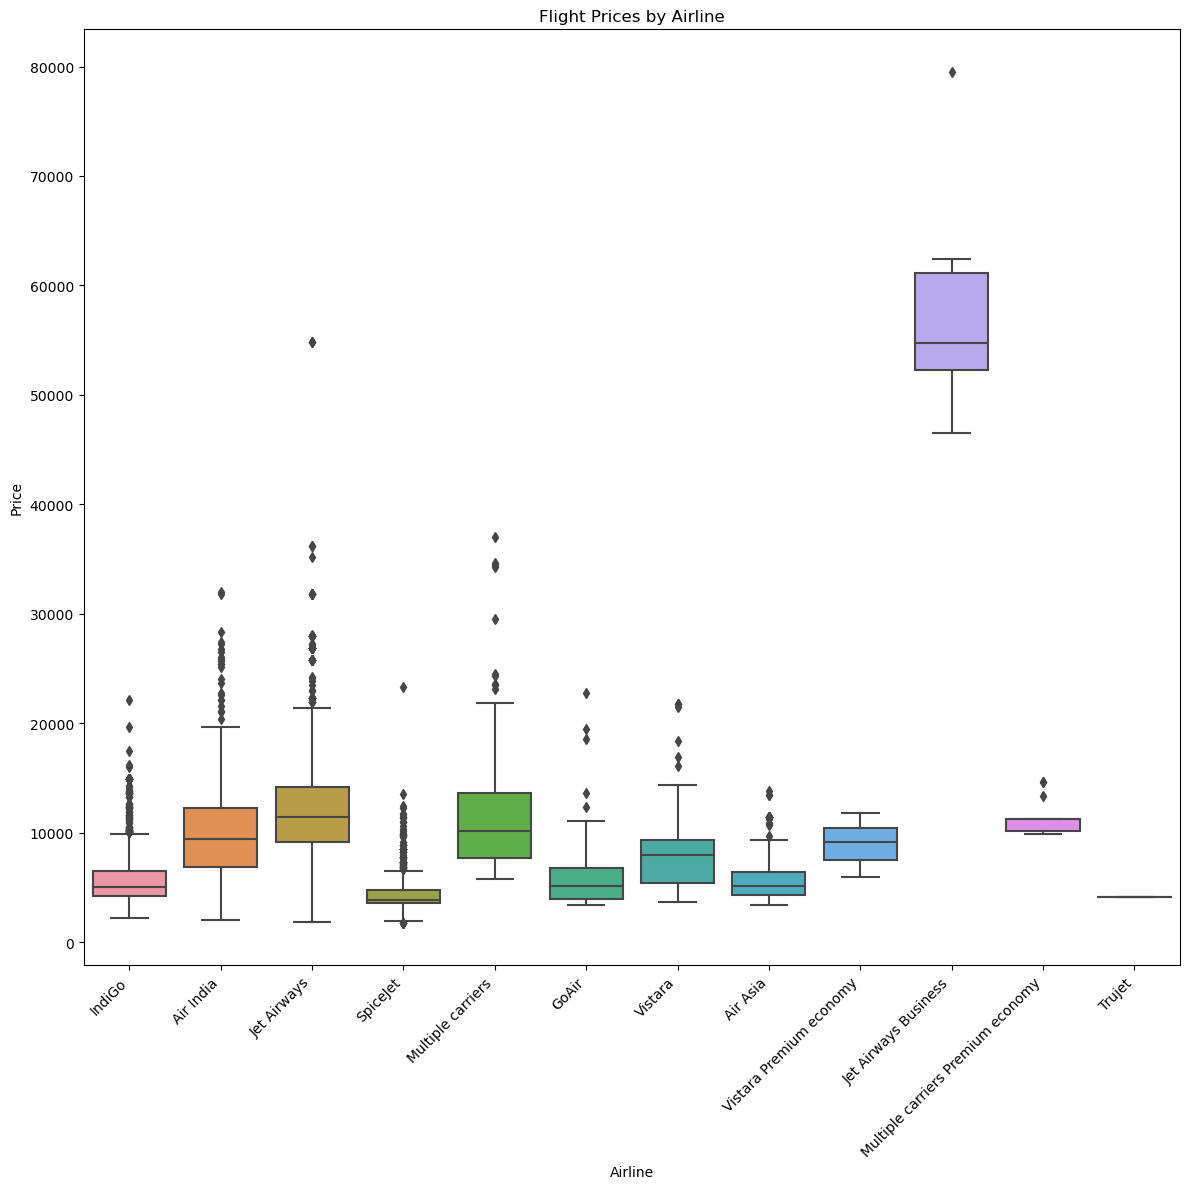

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.boxplot(data=df,x='Airline',y='Price')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

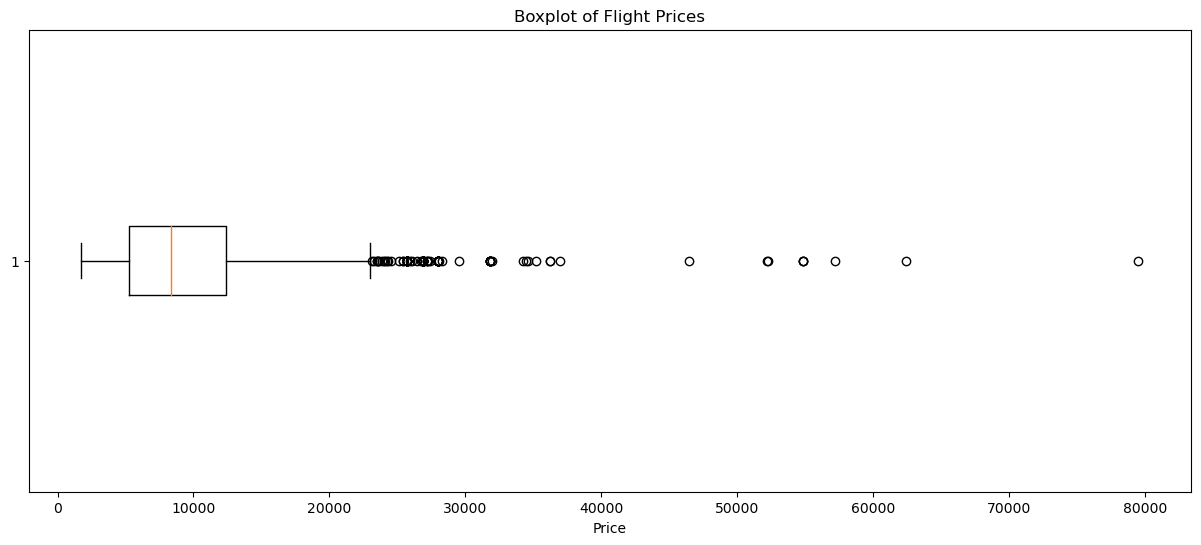

In [5]:
plt.figure(figsize=(15, 6))
plt.boxplot(df['Price'], vert=False)
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')
plt.show()

### Code will generate a boxplot that visualizes the distribution of flight prices in the dataset. Outliers, if present, will be shown as individual data points outside the whiskers of the boxplot. These outliers may impact the analysis by skewing summary statistics such as the mean and standard deviation and potentially influencing model predictions if not handled appropriately. Therefore, it's essential to identify and decide how to handle outliers based on the specific context of the analysis and the goals of the project.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

/tmp/ipykernel_2208/378450927.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  flight_price_data['Date_of_Journey'] = pd.to_datetime(flight_price_data['Date_of_Journey'])


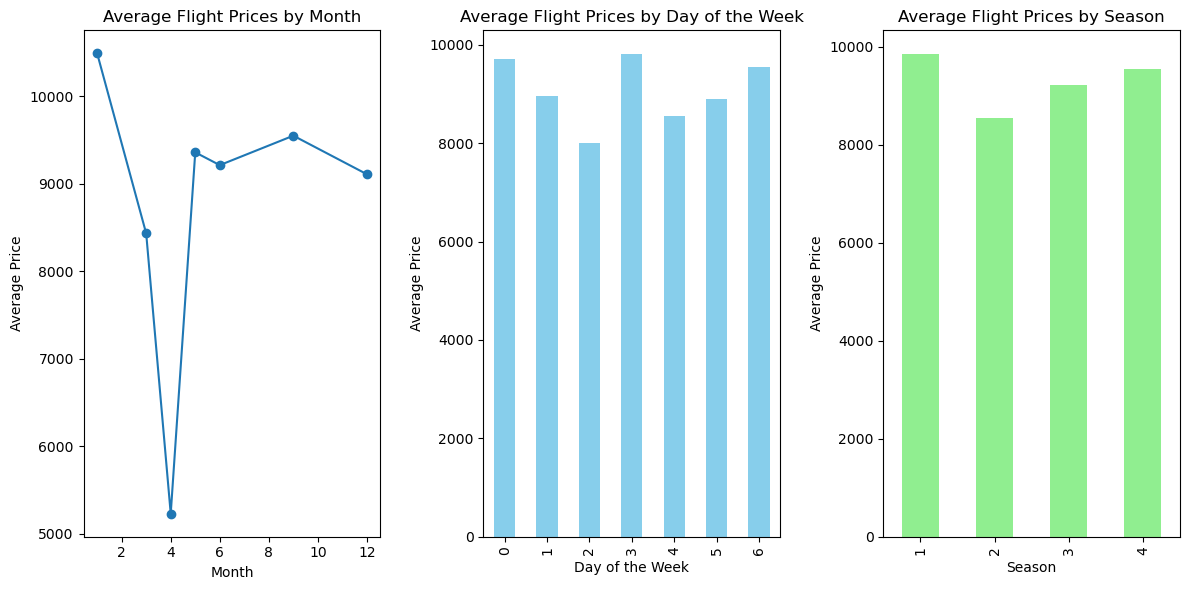

In [6]:
import warnings

flight_price_data=df
flight_price_data['Date_of_Journey'] = pd.to_datetime(flight_price_data['Date_of_Journey'])

# Extract relevant features: month, day of the week, and season
flight_price_data['Month'] = flight_price_data['Date_of_Journey'].dt.month
flight_price_data['Day_of_Week'] = flight_price_data['Date_of_Journey'].dt.dayofweek
flight_price_data['Season'] = (flight_price_data['Month']%12 + 3)//3

# Aggregate flight prices by month
monthly_avg_prices = flight_price_data.groupby('Month')['Price'].mean()

# Aggregate flight prices by day of the week
day_of_week_avg_prices = flight_price_data.groupby('Day_of_Week')['Price'].mean()

# Aggregate flight prices by season
seasonal_avg_prices = flight_price_data.groupby('Season')['Price'].mean()

# Visualize findings
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
monthly_avg_prices.plot(kind='line', marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

plt.subplot(1, 3, 2)
day_of_week_avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Flight Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

plt.subplot(1, 3, 3)
seasonal_avg_prices.plot(kind='bar', color='lightgreen')
plt.title('Average Flight Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

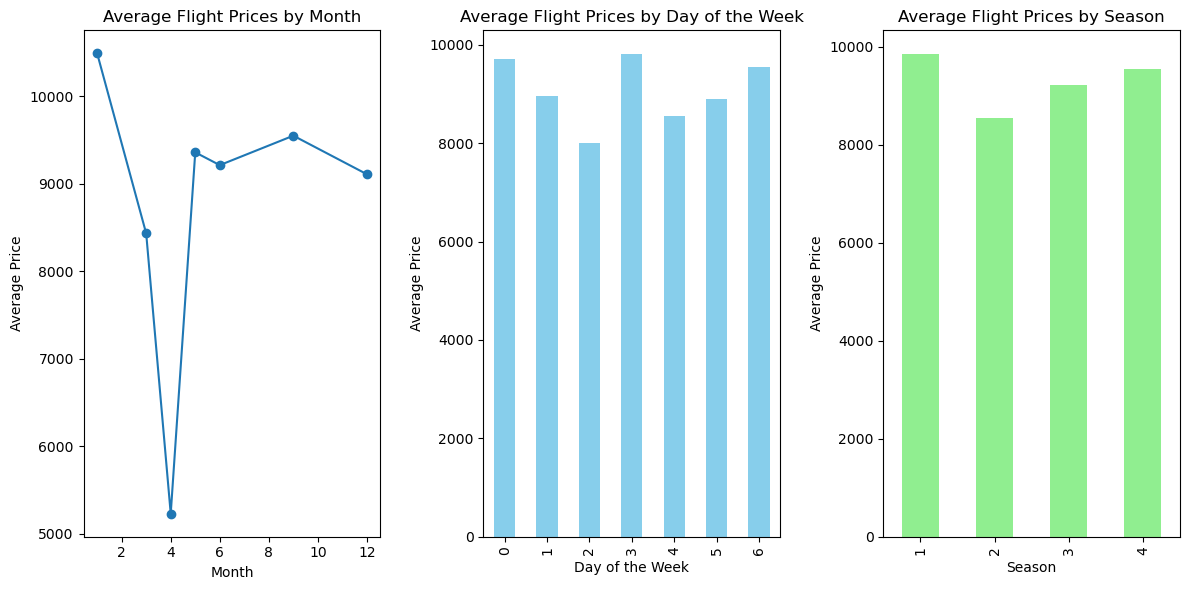

In [7]:

monthly_avg_prices = flight_price_data.groupby('Month')['Price'].mean()

# Aggregate flight prices by day of the week
day_of_week_avg_prices = flight_price_data.groupby('Day_of_Week')['Price'].mean()

# Aggregate flight prices by season
seasonal_avg_prices = flight_price_data.groupby('Season')['Price'].mean()

# Visualize findings
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
monthly_avg_prices.plot(kind='line', marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

plt.subplot(1, 3, 2)
day_of_week_avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Flight Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

plt.subplot(1, 3, 3)
seasonal_avg_prices.plot(kind='bar', color='lightgreen')
plt.title('Average Flight Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

### This program loads the Flight Price dataset, extracts relevant features (month, day of the week), aggregates flight prices by different time intervals, and visualizes the findings using line plots for monthly average prices and bar charts for average prices by day of the week. These visualizations can help identify trends in flight prices over time and across different days of the week, providing valuable insights for the flight booking website's team. Additionally, you can further analyze trends by considering other features such as airline, source, destination, and flight duration, and present the findings using appropriate visualizations.

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

## we can do analysis based on peak travel season. as we can see above flight prices are  generally high in season 1 and season 4. we can provide other factor such as travel destination, number of stops, name of airline services 

# Google Playstore

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [46]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.shape

(10841, 13)

## This indicates that the dataset contains 10,841 rows and 13 columns.

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


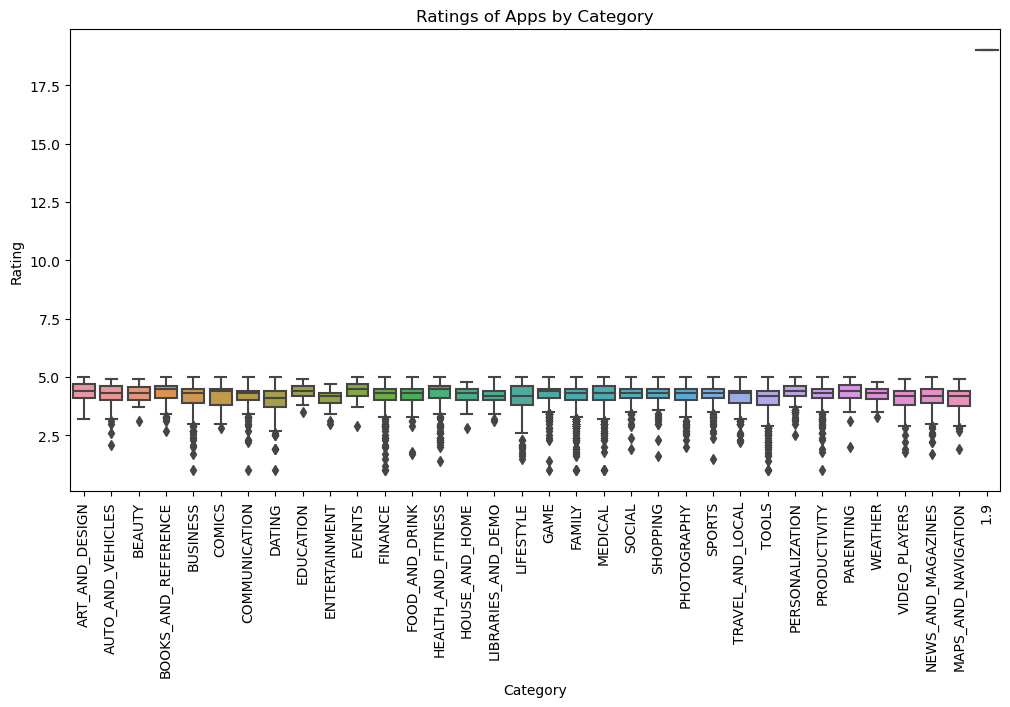

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Ratings of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [49]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### yes there are missing value in ratings,type,content rating,current version and android version,It's essential to handle missing values appropriately based on the specific analysis requirements and potential implications for decision-making.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

/tmp/ipykernel_2208/2001126947.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['Size']=df_copy['Size'].str.replace('+','')


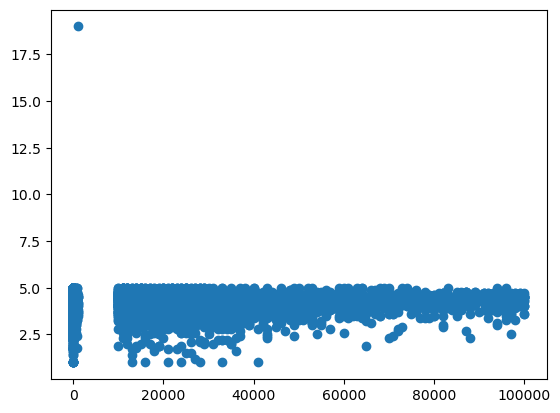

In [67]:
df_copy=df.copy()
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].str.replace('+','')
df_copy['Size']=df_copy['Size'].str.replace(',','')
df_copy['Size']=df_copy['Size'].astype(float)



plt.scatter(y=df_copy['Rating'],x=df_copy['Size'])


# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store dataset and make recommendations to a mobile app development company, we can analyze various features that may indicate success for app developers. Here's how we can approach this task:

1. **Number of Installs**: Analyze the total number of installs for each app developed by the developer. A higher number of installs generally indicates greater success.

2. **Average Rating**: Consider the average rating of apps developed by the developer as a measure of user satisfaction. Higher ratings suggest better-performing apps.

3. **Number of Reviews**: Analyze the total number of reviews for each app developed by the developer. A higher number of reviews may indicate greater user engagement and popularity.

4. **App Size**: Evaluate the average size of apps developed by the developer. Some users may prefer smaller apps, while others may prefer feature-rich apps regardless of size.

5. **Price**: Consider the pricing strategy employed by the developer, including the proportion of free and paid apps and the average price of paid apps.

6. **Release Frequency**: Analyze the frequency of app releases by the developer. Developers who consistently release updates may be more engaged with their user base.

7. **Category Distribution**: Examine the distribution of app categories developed by the developer. A diverse portfolio across different categories may indicate adaptability and market awareness.

8. **Revenue (for paid apps)**: If revenue data is available, analyze the revenue generated by the developer from paid apps.

9. **User Engagement Metrics**: Consider additional metrics such as user retention rates, active user counts, or in-app purchase data if available.

Based on these features, we can provide recommendations to the mobile app development company regarding successful app developers. We can present our findings using various data visualizations such as:

- **Bar Charts**: Compare metrics such as total installs, average rating, and number of reviews across different developers.
- **Scatter Plots**: Visualize the relationship between app size, price, and user engagement metrics.
- **Pie Charts**: Show the distribution of app categories developed by each developer.
- **Line Plots**: Track the release frequency of apps over time for each developer.
- **Heatmaps**: Analyze the correlation between different metrics to identify patterns and trends.

By combining these visualizations and insights derived from the analysis, we can provide valuable recommendations to the mobile app development company regarding the most successful app developers in the Google Play Store dataset.

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best time to launch a new app in the Google Play Store dataset, several features can be analyzed to make recommendations to the marketing research firm. Here's how we can approach this task:

1. **App Release Date**: Analyze the distribution of app releases over time to identify trends and patterns. This involves considering the month, day of the week, and even the time of the year when apps are launched.

2. **Number of Installs Over Time**: Examine the trend of app installs over time to identify periods of high demand and popularity. This can help determine when users are most active in downloading new apps.

3. **Average Rating Over Time**: Evaluate how app ratings change over time after release. This can provide insights into the initial reception of apps and how they perform over time.

4. **Number of Reviews Over Time**: Analyze the trend of app reviews over time to gauge user engagement and feedback. Higher numbers of reviews may indicate increased user activity and interest.

5. **Competition Analysis**: Study the release patterns of competitor apps to identify periods of low competition or saturation in specific categories.

6. **Seasonal Trends**: Consider seasonal factors that may affect app launches, such as holidays, major events, or cultural trends.

7. **Category-specific Analysis**: Analyze trends within specific app categories to identify optimal launch times for different types of apps.

8. **Marketing Campaigns**: Consider the timing of marketing campaigns and promotions by successful apps to identify strategies for maximizing visibility and user engagement.

Based on these features, we can provide recommendations to the marketing research firm regarding the best time to launch a new app. We can present our findings using various data visualizations such as:

- **Line Plots**: Show the trend of app releases, installs, ratings, and reviews over time.
- **Bar Charts**: Compare metrics such as installs, ratings, and reviews across different time periods (e.g., months, seasons).
- **Heatmaps**: Analyze the distribution of app launches and user activity over different time intervals.
- **Box Plots**: Identify outliers and variations in app performance metrics over time.
- **Stacked Area Plots**: Visualize the market share of different app categories over time to identify shifts in popularity.

By combining these visualizations and insights derived from the analysis, we can provide valuable recommendations to the marketing research firm regarding the optimal timing for launching a new app in the Google Play Store.